In [4]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [5]:
#Instantiate IRIS dataset
data = load_iris()

In [6]:
#IRIS dataset feature names
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#IRIS dataser target names
data.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [8]:
#Extract petal length and petal width as features
X = data.data[:,[2,3]]
#Extract target species
y = data.target

In [9]:
#Create training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
#Preprocessing features such that its mean will be 0 and std 1
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
#Instantiate the perceptron model
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=0)
#Fit the model on training dataset
ppn.fit(X_train_std,y_train)
#Predict the target on test dataset
y_pred = ppn.predict(X_test_std)

In [12]:
print('Total miss classified by the model : {}'.format((y_pred != y_test).sum()))

Total miss classified by the model : 4


In [13]:
print('Accuracy score of the model : {}'.format(ppn.score(X_test_std,y_test)))

Accuracy score of the model : 0.9111111111111111


In [50]:
#Lets combine train and test sets and plot it
X = np.vstack([X_train_std,X_test_std])
y = np.hstack([y_train,y_test])

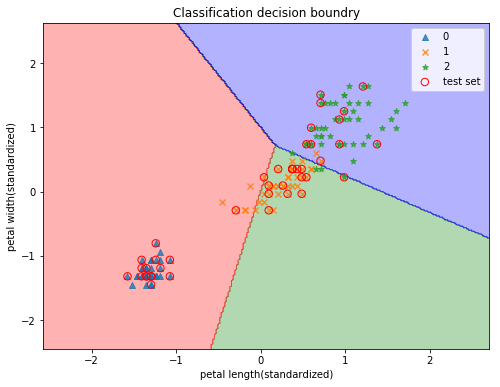

In [111]:
#Ploting decision boundry
marker = ('^','x','*')
color = ('red','green','blue','lightgray','gray','cyan')
cmap = ListedColormap(color[:len(np.unique(y))])
x1_min,x1_max = X[:,0].min() -1, X[:,0].max() +1
x2_min,x2_max = X[:,1].min() -1, X[:,1].max() +1
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
z = ppn.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
z = z.reshape(xx1.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.title('Classification decision boundry')
#plot the data points
for idx,clas in enumerate(np.unique(y)):
    plt.scatter(X[y==clas,0],X[y==clas,1],marker=marker[idx],alpha=0.8,cmap=cmap(idx),label=clas)
plt.scatter(X_test_std[:,0],X_test_std[:,1],edgecolors='r',facecolors='none',alpha=1,linewidths=1,marker='o',s=55, label='test set')
plt.legend()
plt.show()